## Execute the below code from **Task 1** to create desired **Graph & Adjacency matrix** further


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

# Load the dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Modified Network Dataset.xlsx")

# Count total number of students
total_students = df['Roll Number'].count()

# Generate nodes for the graph
nodes = range(total_students)

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for node in nodes:
    G.add_node(node)

# Map roll numbers to nodes
node_roll_number_map = {node: roll_number for node, roll_number in zip(nodes, df['Roll Number'])}

# Create edges between nodes
for node, roll_number in node_roll_number_map.items():
    for col in df.columns[2:]:
        connected_roll_number = df.loc[node, col]
        for connected_node, rn in node_roll_number_map.items():
            if rn == connected_roll_number:
                G.add_edge(node, connected_node)





   # Centrality Measures:
* Degree Centrality: Degree centrality measures the number of connections each student has in the network.

*   Clustering Coefficient: Clustering coefficient measures the extent to which students' connections form tightly-knit clusters or communities.
*   Betweenness Centrality: Betweenness centrality measures the importance of each student as bridges or intermediaries between different groups within the network.



In [2]:
# Degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Clustering coefficient for each node
clustering_coefficient = nx.clustering(G)

# Betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

### Visualize the Network:

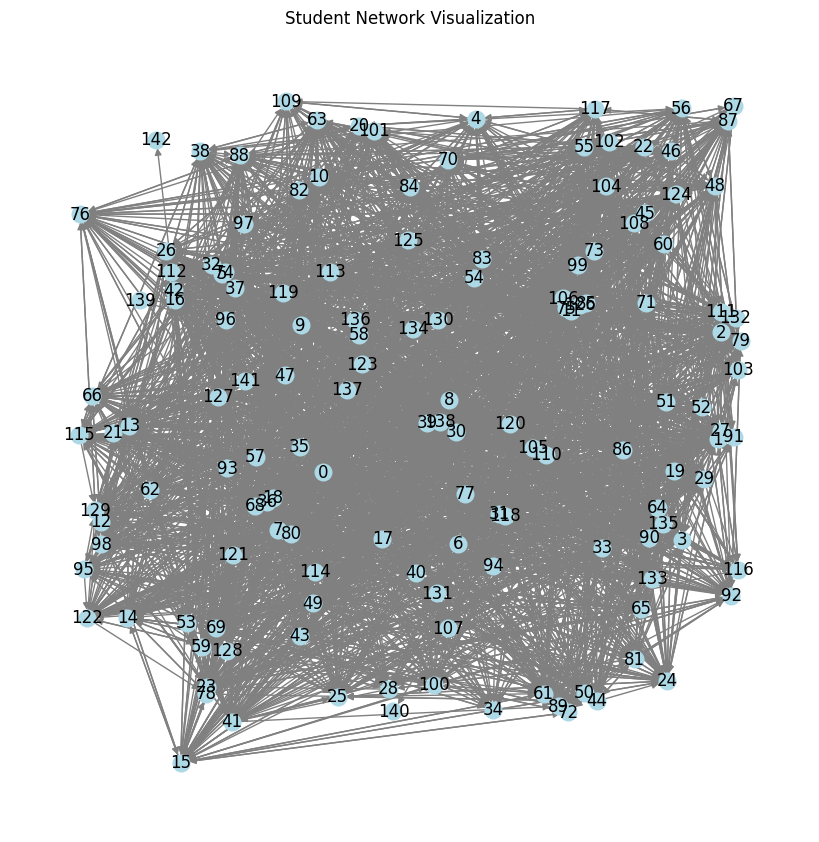

In [3]:
import matplotlib.pyplot as plt

# Compute random layout for the network as the initial layout
random_layout = nx.random_layout(G)

# Visualize the network with spring layout
plt.figure(figsize=(8,8))
nx.draw(G, pos=random_layout, with_labels=True, node_color='lightblue', node_size=143, edge_color='gray')
plt.title("Student Network Visualization")
plt.show()

In [4]:
# Print centrality measures to get the idea of their value ranges
print("Degree Centrality:", degree_centrality)
print("Clustering Coefficient:", clustering_coefficient)
print("Betweenness Centrality:", betweenness_centrality)

Degree Centrality: {0: 0.5070422535211268, 1: 0.4507042253521127, 2: 0.3380281690140845, 3: 0.3591549295774648, 4: 0.3873239436619718, 5: 0.3873239436619718, 6: 0.29577464788732394, 7: 0.3873239436619718, 8: 0.35211267605633806, 9: 0.35211267605633806, 10: 0.45774647887323944, 11: 0.4014084507042254, 12: 0.2323943661971831, 13: 0.4366197183098592, 14: 0.44366197183098594, 15: 0.4507042253521127, 16: 0.44366197183098594, 17: 0.31690140845070425, 18: 0.2323943661971831, 19: 0.3943661971830986, 20: 0.3873239436619718, 21: 0.35211267605633806, 22: 0.3732394366197183, 23: 0.4366197183098592, 24: 0.4295774647887324, 25: 0.4859154929577465, 26: 0.49295774647887325, 27: 0.4084507042253521, 28: 0.31690140845070425, 29: 0.3943661971830986, 30: 0.5, 31: 0.2183098591549296, 32: 0.2183098591549296, 33: 0.4507042253521127, 34: 0.2183098591549296, 35: 0.2112676056338028, 36: 0.35211267605633806, 37: 0.4014084507042254, 38: 0.36619718309859156, 39: 0.3028169014084507, 40: 0.24647887323943662, 41: 0.50

#Using K means

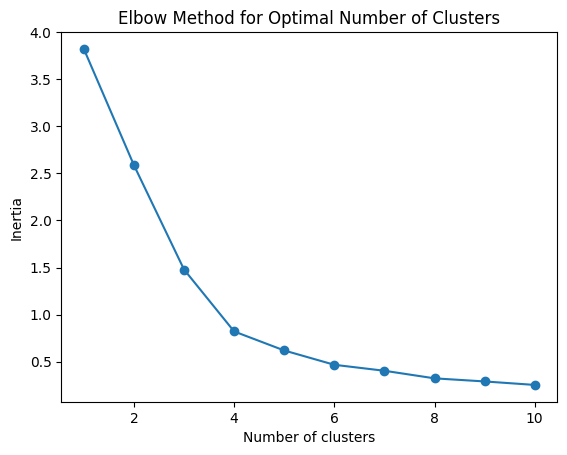

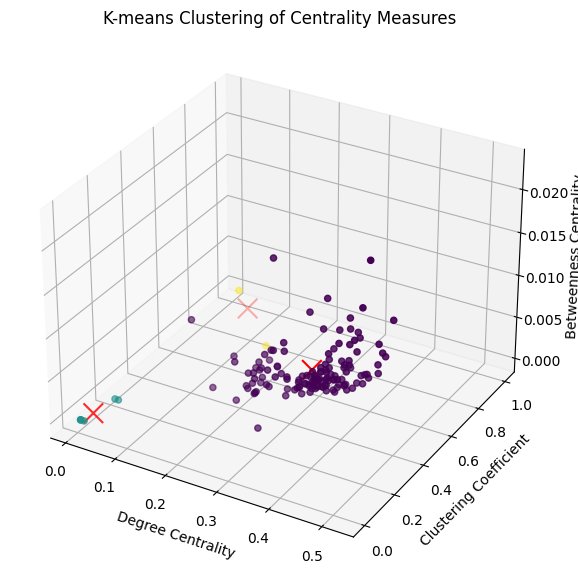

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

# Filter out specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Combine the centrality measures into a feature matrix X
X = np.array([[degree_centrality[student], clustering_coefficient[student], betweenness_centrality[student]] for student in degree_centrality])

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to find the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
optimal_k = 3  # Adjust this value based on the elbow plot

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot clusters in 3D space
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, cmap='viridis', marker='o')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='red', marker='x', s=200)
ax.set_xlabel('Degree Centrality')
ax.set_ylabel('Clustering Coefficient')
ax.set_zlabel('Betweenness Centrality')
ax.set_title('K-means Clustering of Centrality Measures')
plt.show()

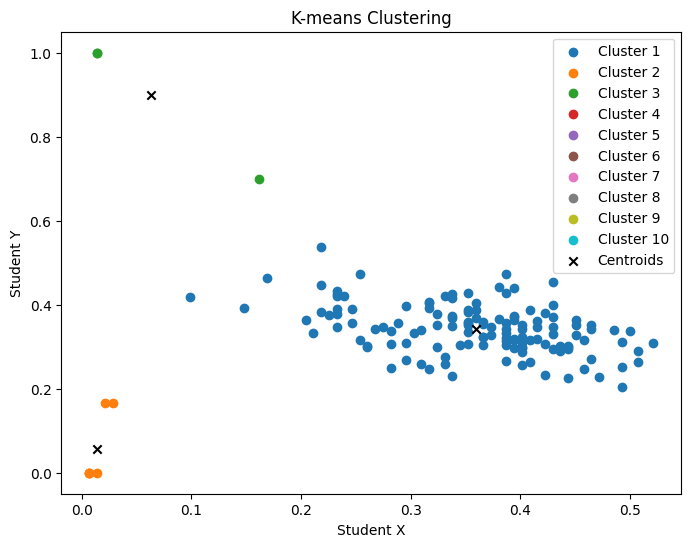

In [6]:
# Get the cluster labels for each data point
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')
plt.xlabel('Student X')
plt.ylabel('Student Y')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [7]:
# Extract threshold values from cluster centroids
degree_threshold, clustering_threshold, betweenness_threshold = cluster_centers.mean(axis=0)

print("Degree Threshold:", degree_threshold)
print("Clustering Threshold:", clustering_threshold)
print("Betweenness Threshold:", betweenness_threshold)

Degree Threshold: 0.14559246023404107
Clustering Threshold: 0.4328260656478628
Betweenness Threshold: 0.0023029748698093484


In [8]:
def identify_at_risk_students(degree_centrality, clustering_coefficient, betweenness_centrality):
    at_risk_students = []
    for student in degree_centrality:
        # Adjusted criteria for identifying at-risk students
        if (degree_centrality[student] < degree_threshold) and \
           (clustering_coefficient[student] < clustering_threshold) and \
           (betweenness_centrality[student] < betweenness_threshold):
            at_risk_students.append(student)
    return at_risk_students

In [9]:
# Identify at-risk students with adjusted criteria
at_risk_students = identify_at_risk_students(degree_centrality, clustering_coefficient, betweenness_centrality)
at_risk_roll_numbers = [node_roll_number_map[node] for node in at_risk_students]
print("At-Risk Students:", at_risk_roll_numbers)

At-Risk Students: ['2022CSB1072', '2023CSB1153', '2022CSB1141', '2023CSB1168', '2023CSB1165', '2023MCB1286']


In [10]:
# Filter student DataFrame for at-risk students
at_risk_student_df = df[df['Roll Number'].isin(at_risk_roll_numbers)]

# Print DataFrame containing at-risk students' roll numbers and names without index
print(at_risk_student_df[['Roll Number', 'Name']].to_string(index=False))

Roll Number           Name
2022CSB1072  BHUKYA RAKESH
2023CSB1153   RITESH KUMAR
2022CSB1141  VARSHAL SAINI
2023CSB1168    SWAM SINGLA
2023CSB1165   SUMIT SHARMA
2023MCB1286 AMRITPAL SINGH
